## Exercise 05

# Neural networks

### Mónica Tatiana Gutiérrez - Mario Felipe Garcia

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

In [1]:
import pandas as pd
import numpy as np
databaseLTRH = {'Big Ears'  : [1,0,0],'Big Teeth' : [1,1,0],'Handsome'  : [0,1,0],
                'Wrinkled'  : [0,0,1],'Scream'    : [1,0,0],'Hug'       : [0,0,1],
                'Food'      : [0,1,1],'Kiss'      : [0,1,0]}
databaseLTRH = pd.DataFrame(databaseLTRH)
databaseLTRH

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1,1,0,0,1,0,0,0
1,0,1,1,0,0,0,1,1
2,0,0,0,1,0,1,1,0


In [33]:
X = databaseLTRH.iloc[:,0:3]
y = databaseLTRH.iloc[:,4:7]

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=20, input_dim=3))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('sigmoid'))

In [64]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

In [60]:
model.fit(X, y, epochs=50, verbose=2)

Epoch 1/50
 - 0s - loss: 0.0096 - acc: 1.0000
Epoch 2/50
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 3/50
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 4/50
 - 0s - loss: 0.0095 - acc: 1.0000
Epoch 5/50
 - 0s - loss: 0.0094 - acc: 1.0000
Epoch 6/50
 - 0s - loss: 0.0094 - acc: 1.0000
Epoch 7/50
 - 0s - loss: 0.0094 - acc: 1.0000
Epoch 8/50
 - 0s - loss: 0.0093 - acc: 1.0000
Epoch 9/50
 - 0s - loss: 0.0093 - acc: 1.0000
Epoch 10/50
 - 0s - loss: 0.0093 - acc: 1.0000
Epoch 11/50
 - 0s - loss: 0.0092 - acc: 1.0000
Epoch 12/50
 - 0s - loss: 0.0092 - acc: 1.0000
Epoch 13/50
 - 0s - loss: 0.0092 - acc: 1.0000
Epoch 14/50
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 15/50
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 16/50
 - 0s - loss: 0.0091 - acc: 1.0000
Epoch 17/50
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 18/50
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 19/50
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 20/50
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 21/50
 - 0s - loss: 0.0089 - acc: 1.0000
Epoch 22/50
 - 0s - lo

_______________

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.



1. Load the dataset using `from sklearn.datasets import load_boston`.
2. Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.
3. Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn. 
4. Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.
5. Use the function `.describe()` from Pandas for obtaining statistics about each column.

In [9]:
from sklearn.datasets import load_boston
boston_load = load_boston()
boston = pd.DataFrame(boston_load.data, columns=boston_load.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston.shape

(506, 13)

In [11]:
boston['MEDV'] = boston_load['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Se realiza la importación de la data Boston usando los comandos recomendados. Respecto a la base de datos se pueden analizar algunas cifras que resultan interesantes:
- El índice de crimen per capita por ciudad aunque está entre un intervalo de 0.006-88.97, el percentil 75% es igual a 3.64 lo que nos permite ver que 3/4 de la información está por debajo de esta cifra y el restante, que es una parte pequeña, es el que tiene algunos valores que agrandan el rango de la variable.  

## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.
* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).
     * Do you find any relationship between the features?
     

In [13]:
X = boston[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE']]
y = boston[['MEDV']]

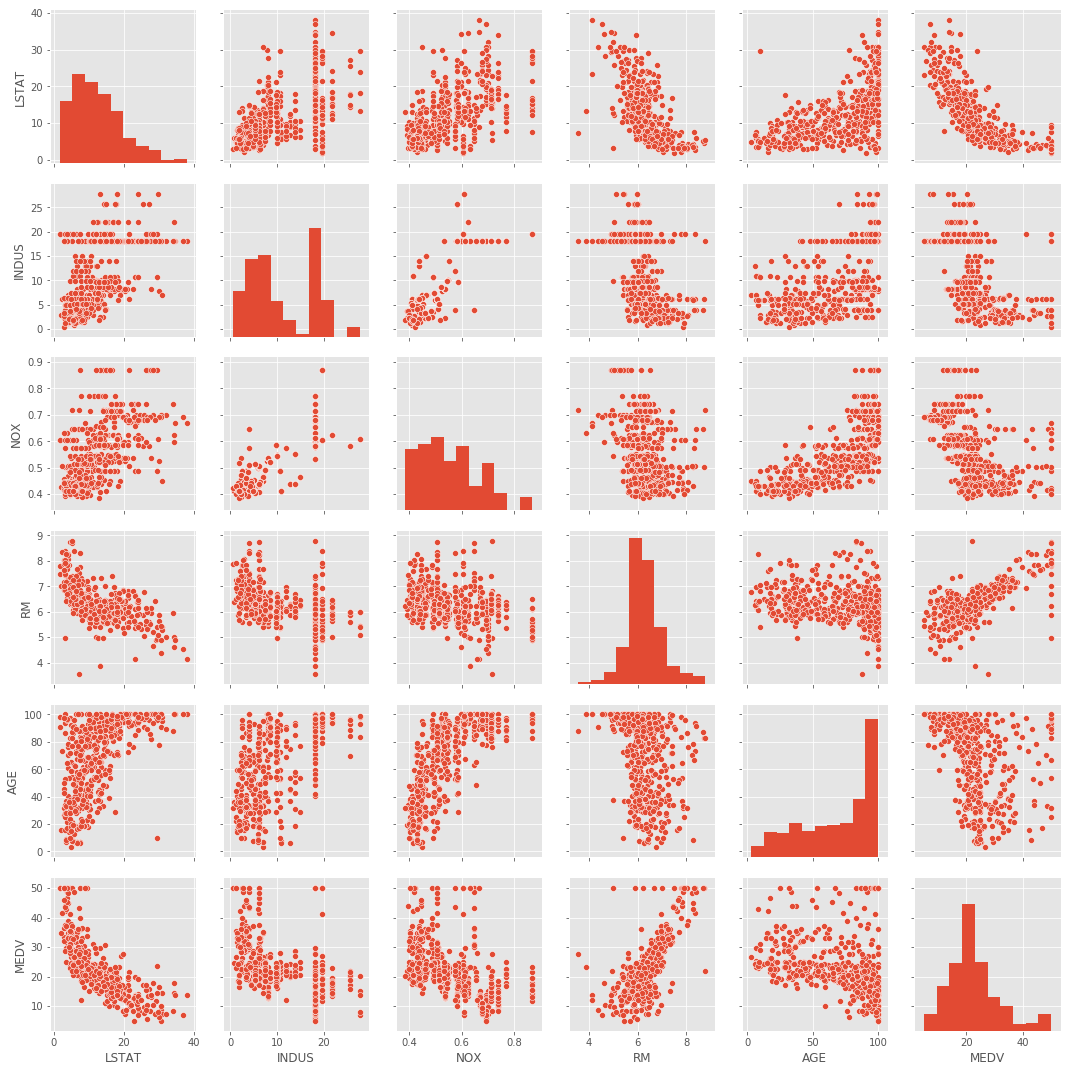

In [17]:
import seaborn as sns
g1 = sns.pairplot(boston[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE','MEDV']])

* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?
     * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.
     

In [18]:
corre = (boston[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE','MEDV']]).corr()
corre

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


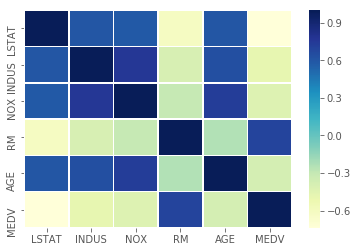

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

sns.heatmap(corre, linewidths=.5,cmap="YlGnBu")

Esta matriz nos permite ver la correlación (positiva o negativa) que existe entre todas las variables. Claramente en la diagonal los cuadros son azul oscuro dado que es la correlación de una variable consigo misma (Corr = 1).
De manera rápida podemos observar que de las 5 variables explicativas, solo 1 (el # promedio de habitaciones por vivienda, RM) tiene una correlación positiva con el valor medio de las viviendas ocupadas por sus propietarios. 
Por otra parte, la proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE), la proporción de acres de negocios no minoristas por pueblo (NOX) y la concentración de óxidos nítricos tienen una correlación negativa frente al valor medio de las viviendas ocupadas por sus propietarios, es decir, que cuando el valor de estas variables aumenta, el costo medio de las viviendas ocupadas por sus propietarios baja.

## 4.4 Modeling linear and non linear relationships

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$
     

In [22]:
X_1 = boston.RM
y_1 = boston.MEDV

X_2 = boston.LSTAT
y_2 = boston.MEDV

* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $

In [23]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.30, random_state=666)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.30, random_state=666)

* Train a linear regression model on both subsets of data:
     * Report the mean square error on the test set
     * Print the values of $ w $ and $ w_0 $ of the regression equation
     * Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data
     

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_1 = LinearRegression(fit_intercept=True)
model_1.fit(X_train_1.values.reshape(-1,1), y_train_1)
y_predict_1 = model_1.predict(X_test_1.values.reshape(-1,1))
mse_1= mean_squared_error(y_predict_1,y_test_1)
mse_1

40.41237365319775

In [59]:
model_1.intercept_,model_1.coef_

(-35.48090633823544, array([9.23560156]))

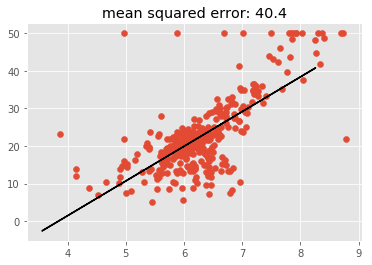

In [58]:
plt.scatter(X_train_1.ravel(), y_train_1)
plt.plot(X_test_1.ravel(), y_predict_1,c='black')
plt.title("mean squared error: {0:.3g}".format(mse_1));

In [61]:
model_2 = LinearRegression(fit_intercept=True)
model_2.fit(X_train_2.values.reshape(-1,1), y_train_2)
y_predict_2 = model_2.predict(X_test_2.values.reshape(-1,1))
mse_2= mean_squared_error(y_predict_2,y_test_2)
mse_2

30.120013883335158

In [62]:
model_2.intercept_,model_2.coef_

(34.76907859672359, array([-0.95198853]))

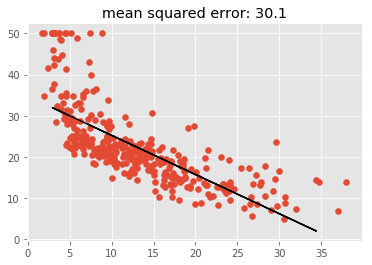

In [47]:
plt.scatter(X_train_2.ravel(), y_train_2)
plt.plot(X_test_2.ravel(), y_predict_2,c='black')
plt.title("mean squared error: {0:.3g}".format(mse_2));

* How does the model perform on $ D_1 $ and $ D_2 $? Why?

El error cuadrático medio del segundo modelo $D_2$ da más bajo que el de $D_1$, esto permite ver que la variable # promedio de habitaciones por vivienda no explica tan bien el costo medio de las viviendas ocupadas por sus propietarios baja como si lo hace el % de bajo estatus de población.

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)

In [75]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
X = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = boston.MEDV

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=666)

* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
     

In [78]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mse= mean_squared_error(y_predict,y_test)
mse

24.335965186179255

* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set

In [86]:
from sklearn.neural_network import MLPRegressor
model_MLP = MLPRegressor(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(128, 512), random_state=666)
model_MLP.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=666,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [87]:
y_predict_MLP = model_MLP.predict(X_test)
mse= mean_squared_error(y_predict_MLP,y_test)
mse

29.940559946017498

* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [88]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
          * Report the mean square error on the test set
     3. Which model has better performance? Why?
         
         

In [89]:
model_s = LinearRegression(fit_intercept=True)
model_s.fit(X_train_s, y_train)
y_predict = model_s.predict(X_test_s)
mse= mean_squared_error(y_predict,y_test)
mse

24.33596518617963

In [90]:
model_MLP = MLPRegressor(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(128,512), random_state=666)
model_MLP.fit(X_train_s,y_train)
y_predict_MLP = model_MLP.predict(X_test_s)
mse= mean_squared_error(y_predict_MLP,y_test)
mse

12.429005982413793

El error cuadrático medio con la función MLPRegressor es aproximadamente el 50% menos que los modelos ajustados con regresiones lineales simples aún cuando se escalan los datos. A mayor numero de neurones el error es menor.